Canvas(width=500)

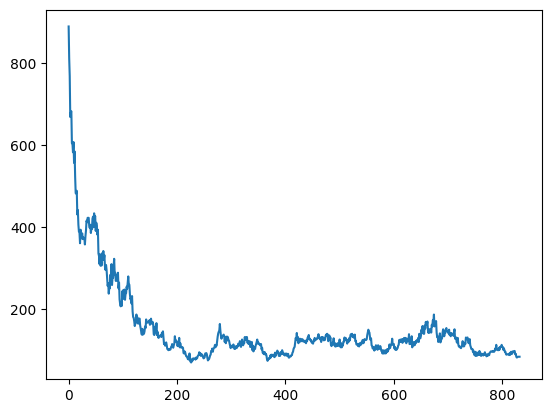

In [1]:
import random
from ipycanvas import Canvas, hold_canvas
import time
from matplotlib import pyplot as plt

def populate(width, height): # Make a table (map) with random cells alive
    table = []
    choices = [0, 0, 1]
    global population
    for i in range(height):
        temp = []
        for j in range(width):
            val = random.choice(choices)
            temp.append(val)
            if val == 1:
                population += 1
        table.append(temp)
    return table

def alive_next_generation(neighborhood):
    global population
    neighbors = sum(sum(row) for row in neighborhood) - neighborhood[1][1] # Count number of neighbors
    alive = neighborhood[1][1]
    if alive:
        if neighbors < 2 or neighbors > 3:
            population -= 1
            return False
        else:
            return True
    else:
        if neighbors == 3:
            population += 1
            return True
        else:
            return False
    
def next_generation(world):
    new_world = [[0 for _ in range(len(world[0]))] for _ in range(len(world))]

    # Go through all cells
    for y in range(len(world)):
        for x in range(len(world[y])):
            # Make a neighborhood
            neighborhood = []
            for i in range(3):
                temp = []
                for j in range(3):
                    temp.append(world[(y - 1 + i) % len(world)][(x - 1 + j) % len(world[y])])

                neighborhood.append(temp)
            
            alive = alive_next_generation(neighborhood)  # Check if alive based on neighborhood
            if alive:
                new_world[y][x] = 1
            else:
                new_world[y][x] = 0

    return new_world

width = 500
height = 500
cell_size = 10
fps = 60
canvas = Canvas(width = width, height = height)
tick = 0
population = 0
poplist = []
dpoplist = []
stabilitylist = []
stable = False

world = populate(int(width/cell_size), int(height/cell_size))
display(canvas)

while stable == False:
    with hold_canvas(canvas):
        canvas.clear()
        for i in range(len(world)):
            for j in range(len(world[i])):
                posX = j*cell_size
                posY = i*cell_size
                if world[i][j] == 1:
                    canvas.fill_style = "black"
                    canvas.fill_rect(posX, posY, cell_size, cell_size)

        
        world = next_generation(world)
        poplist.append(population)
        if len(poplist) > 2:
            dpop = (poplist[-1] - poplist[-2])
        else:
            dpop = (poplist[-1])
        dpoplist.append(dpop)
        
        if len(dpoplist) > 3:
            rollingdpop = abs(dpoplist[-1]) + abs(dpoplist[-2]) + abs(dpoplist[-3]) + abs(dpoplist[-4])
            if rollingdpop < 2:
                stable = True
                
        tick += 1
        time.sleep(1/fps)
        
timelist = [i for i in range(tick)]        

plt.plot(timelist, poplist)
plt.show()